In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

from matplotlib import font_manager, rc
get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

rc("font", family="Arial Unicode MS")

import warnings
warnings.filterwarnings('ignore')

## 학습 feature 정의

In [39]:
feature_columns = ['avg_negative', 'avg_neutral', 'avg_positive', 'open', 'high', 'low', 'close', 'volume']
stock_columns = ['open', 'high', 'low', 'close', 'volume']
label_column = ['label']
models = {
    "DecisionTree": DecisionTreeClassifier(max_depth=4),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=6),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

## 데이터 load

In [32]:
# 주말 미포함 데이터
weekday_df = pd.read_csv("250520_weekday_sentiment_stock.csv")

# 주말 포함 데이터
weekend_df = pd.read_csv("250520_weekend_sentiment_stock.csv")

## 종가 등락 방향 예측 모델 설계

#### train, test, 시각화 함수 정의

In [43]:
def visualize_result(X_train, X_test, y_train, y_test) :
    # 모델 성능 결과 저장용 리스트
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        f1 = f1_score(y_test, pred)

        results.append({
            "Model" : name,
            "Accuracy" : acc,
            "F1-Score" : f1
        })

        print(f"\n--- {name} ---")
        print("Accuracy:", accuracy_score(y_test, pred))
        print("F1-Score:", f1_score(y_test, pred))
        print(classification_report(y_test, pred))

    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)

    # 시각화
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    index = range(len(results_df))

    # Accuracy 막대
    acc_bars = plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy')

    # F1-Score 막대 (오른쪽에 살짝 옮김)
    f1_bars = plt.bar([i + bar_width for i in index], results_df['F1-Score'], bar_width, label='F1-Score')

    # x축 및 기타 설정
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('모델 성능 비교: Accuracy and F1-Score')
    plt.xticks([i + bar_width / 2 for i in index], results_df['Model'])
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 막대 위에 값 표시 (소수점 둘째 자리까지)
    for bar in acc_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    for bar in f1_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

### 1-1. 감성확률 + 주가(주말 미포함) 예측 모델 성능 비교


--- DecisionTree ---
Accuracy: 0.6
F1-Score: 0.46913580246913583
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       127
           1       0.51      0.43      0.47        88

    accuracy                           0.60       215
   macro avg       0.58      0.57      0.57       215
weighted avg       0.59      0.60      0.59       215


--- RandomForest ---
Accuracy: 0.5488372093023256
F1-Score: 0.5358851674641147
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       127
           1       0.46      0.64      0.54        88

    accuracy                           0.55       215
   macro avg       0.56      0.56      0.55       215
weighted avg       0.58      0.55      0.55       215


--- GradientBoosting ---
Accuracy: 0.5255813953488372
F1-Score: 0.4950495049504951
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       127
       

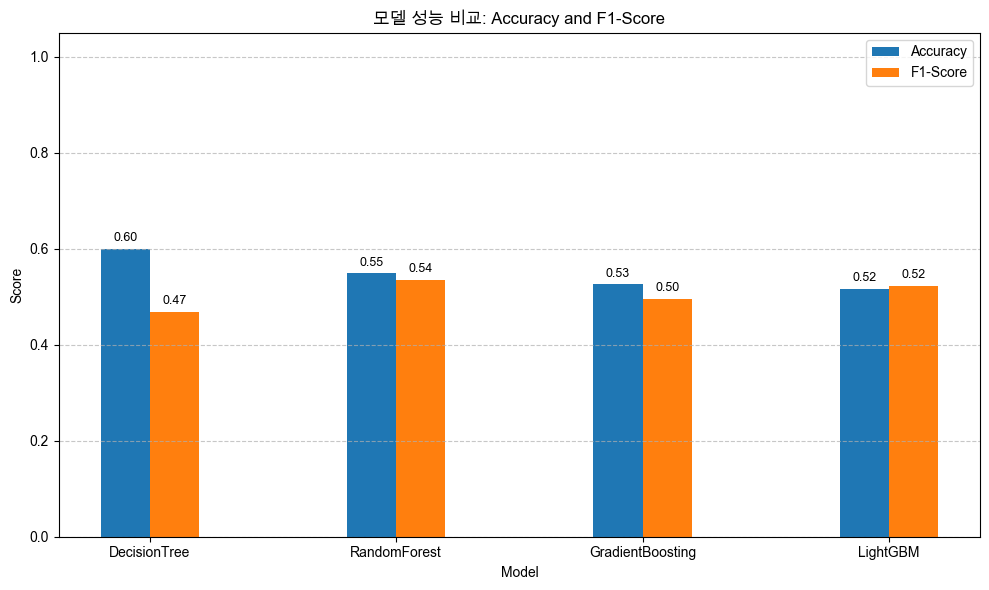

In [ ]:
# 감성확률 + 주가(주말 미포함) 예측 모델 성능 비교
X = weekday_df[feature_columns]
y = weekday_df[label_column]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # 시계열 고려

visualize_result(X_train, X_test, y_train, y_test)

### 1-2. only 주가(주말 미포함) 예측 모델 성능 비교 


--- DecisionTree ---
Accuracy: 0.6
F1-Score: 0.46913580246913583
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       127
           1       0.51      0.43      0.47        88

    accuracy                           0.60       215
   macro avg       0.58      0.57      0.57       215
weighted avg       0.59      0.60      0.59       215


--- RandomForest ---
Accuracy: 0.5441860465116279
F1-Score: 0.5288461538461539
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       127
           1       0.46      0.62      0.53        88

    accuracy                           0.54       215
   macro avg       0.56      0.56      0.54       215
weighted avg       0.57      0.54      0.55       215


--- GradientBoosting ---
Accuracy: 0.5302325581395348
F1-Score: 0.5073170731707317
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       127
       

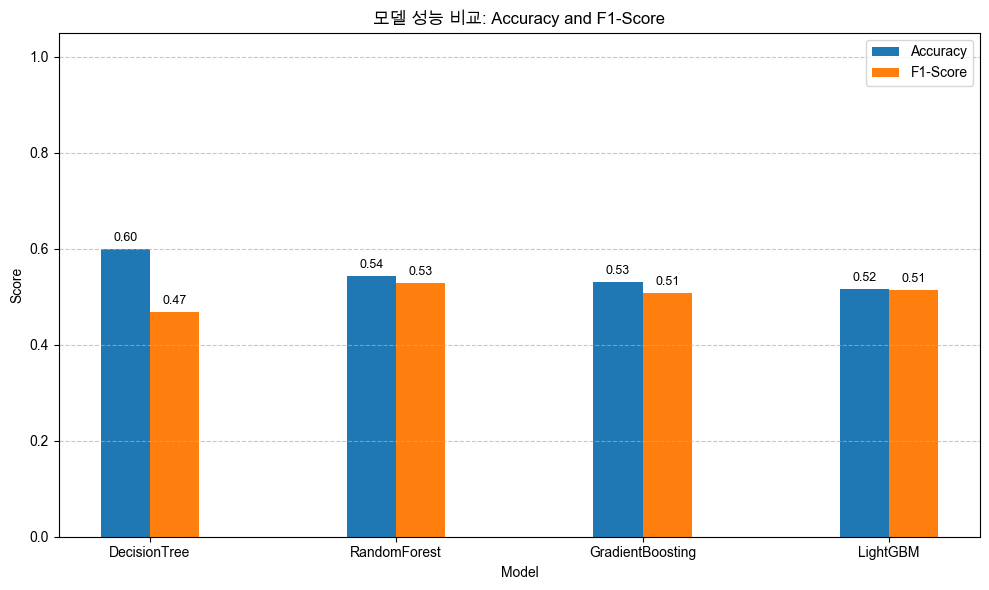

In [46]:
# only 주가(주말 미포함) 예측 모델 성능 비교 시각화
X = weekday_df[stock_columns]
y = weekday_df[label_column].values.ravel()

# 시계열 특성을 고려하여 shuffle=False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

visualize_result(X_train, X_test, y_train, y_test)

### 2-1. 감성확률 + 주가(주말 포함) 예측 모델 성능 비교


--- DecisionTree ---
Accuracy: 0.7071651090342679
F1-Score: 0.06
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       235
           1       0.21      0.03      0.06        86

    accuracy                           0.71       321
   macro avg       0.47      0.49      0.44       321
weighted avg       0.59      0.71      0.62       321


--- RandomForest ---
Accuracy: 0.6728971962616822
F1-Score: 0.2446043165467626
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       235
           1       0.32      0.20      0.24        86

    accuracy                           0.67       321
   macro avg       0.53      0.52      0.52       321
weighted avg       0.63      0.67      0.64       321


--- GradientBoosting ---
Accuracy: 0.6261682242990654
F1-Score: 0.3258426966292135
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       235
       

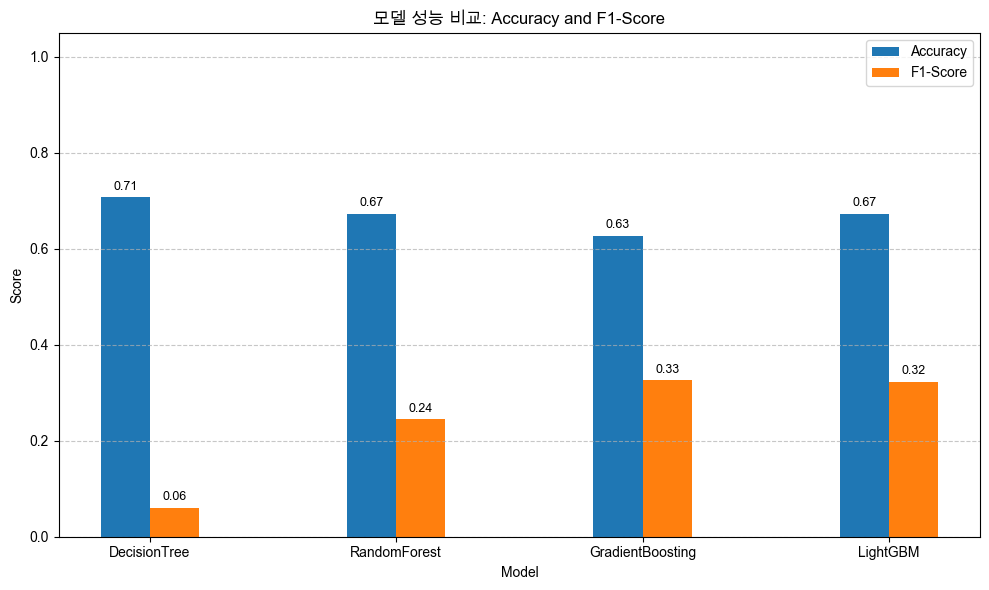

In [47]:
# 감성확률 + 주가(주말 포함) 예측 모델 성능 비교
X = weekend_df[feature_columns]
y = weekend_df[label_column]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # 시계열 고려

visualize_result(X_train, X_test, y_train, y_test)

### 2-2. only 주가(주말 포함) 예측 모델 성능 비교 


--- DecisionTree ---
Accuracy: 0.7289719626168224
F1-Score: 0.08421052631578947
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       235
           1       0.44      0.05      0.08        86

    accuracy                           0.73       321
   macro avg       0.59      0.51      0.46       321
weighted avg       0.66      0.73      0.64       321


--- RandomForest ---
Accuracy: 0.67601246105919
F1-Score: 0.17460317460317462
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       235
           1       0.28      0.13      0.17        86

    accuracy                           0.68       321
   macro avg       0.50      0.50      0.49       321
weighted avg       0.61      0.68      0.63       321


--- GradientBoosting ---
Accuracy: 0.6074766355140186
F1-Score: 0.19230769230769232
              precision    recall  f1-score   support

           0       0.72      0.77      0.74   

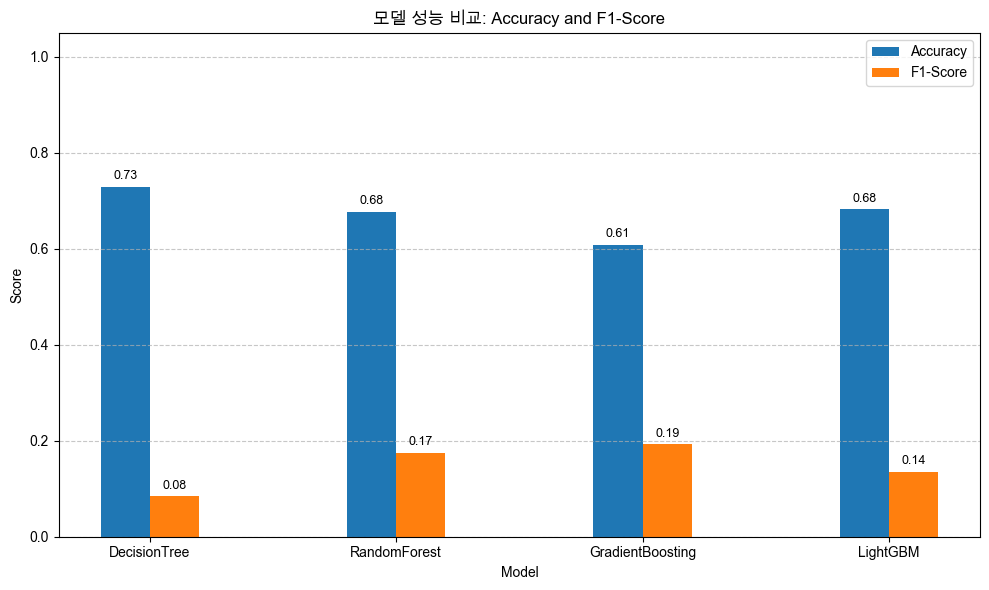

In [48]:
# only 주가(주말 미포함) 예측 모델 성능 비교 시각화
X = weekend_df[stock_columns]
y = weekend_df[label_column].values.ravel()

# 시계열 특성을 고려하여 shuffle=False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

visualize_result(X_train, X_test, y_train, y_test)